In [1]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D # 종합세트
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import tensorflow as tf

In [2]:
# seed 값 설정 : 무작위
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
# 데이터 불러오기
# 이미지의 정규화
# 훈련용, 테스트용으로 나눠주기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 
# 정규화
# 이미지니까 형태를 1차원 array로 만들어줘야 함 reshape, astype으로 해야지, 255 흑백 명도
# 0과 1 사이로 스케일링 해줌 (정규화 비슷함)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 바이너리화 (0~1사이)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11493376/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [4]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) 
# 필터링 (3,3) 여기에 가중치있어서 합성곱 과정있음
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
# pooling 과정: 특징값을 추출하기 위해서(pool size=2는 전체에서 반으로 줄음)
model.add(Dropout(0.25))
model.add(Flatten()) # 1차원으로 만들어주기. 이미지는 2차원이다. >> flatten 1차원으로 차원축소
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) 
# 마지막 출력층: 다중분류 softmax
# 클래스가 10개니까 0~9

# 모델 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [6]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.05415, saving model to ./model/01-0.0541.hdf5

Epoch 00002: val_loss improved from 0.05415 to 0.03877, saving model to ./model/02-0.0388.hdf5

Epoch 00003: val_loss did not improve from 0.03877

Epoch 00004: val_loss improved from 0.03877 to 0.03317, saving model to ./model/04-0.0332.hdf5

Epoch 00005: val_loss improved from 0.03317 to 0.03174, saving model to ./model/05-0.0317.hdf5

Epoch 00006: val_loss improved from 0.03174 to 0.03051, saving model to ./model/06-0.0305.hdf5

Epoch 00007: val_loss did not improve from 0.03051

Epoch 00008: val_loss did not improve from 0.03051

Epoch 00009: val_loss improved from 0.03051 to 0.03006, saving model to ./model/09-0.0301.hdf5

Epoch 00010: val_loss did not improve from 0.03006

Epoch 00011: val_loss did not improve from 0.03006

Epoch 00012: val_loss improved from 0.03006 to 0.02813, saving model to ./model/12-0.0281.hdf5

Epoch 00013: val_loss improved from 0.02813 to 0.02494, saving model to

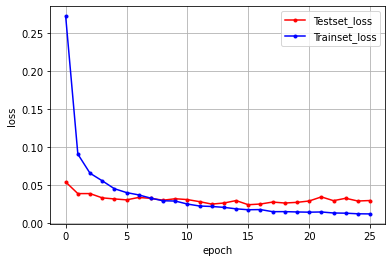

In [8]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()